This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

TF is a pythonbased free open source ML platefor developed by google.


*   Compute the gradient of any differentiable expression
*   Run not only on CPUS but also on GPUs and TPUs parallel hardware accelerators
*   Computation defined in TF can be easily distributed
*   TF programs can be exported to other runtimes (C++, java)

TF is much more than a signle library, it's a platform 



## What's Keras?

Keras is a deep learning API for Python, built on top of TensorFlow

Provides a convenient way to define and train deep learning model.

Developed for research with the aim of enabling fast experimentation

*   Allows the same code to run seamlessly in CPU or GPU
*   Has a user friendly API that makes it easy to quickly prototype deep learning models
*   Hast built in support for convolutional networks, recurrent networks and any combination of both




## Keras and TensorFlow: A brief history

Keras predates TensorFlow by eight months. It was released in March 2015,
and TensorFlow was released in November 2015.

Keras was originally built on top of Theano, another tensor-manipulation
library that provided automatic differentiation and GPU support

In late 2015, after the release of TensorFlow, Keras was refactored to a
multibackend architecture: Use Keras with either Theano or TensorFlow

In 2017, two new additional backend options were added to Keras:
CNTK and MXNet

In 2018, the TensorFlow leadership picked Keras as TensorFlow’s official
high-level API. As a result, the Keras API is front and center in TensorFlow 2.0,
released in September 2019

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

Training a neural network revolves around the following concepts:

1. low-level tensor manipulation: tensors, tensor operations, backpropagation
2. high-level deep learning concepts: layers, loss function, metrics, training loop

#### Constant tensors and variables

To do anything in TF we ll need some tensors

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1)) #same as np.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1)) #same as np.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [3]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)
#tensor of rv drawn from a normal dstn with mean 0 and sd 1.
#same as np.random.normal(size=(3,1), loc=0.,high=1.)

tf.Tensor(
[[ 0.13020909]
 [-1.3356739 ]
 [ 0.8841562 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.13287795]
 [0.16160393]
 [0.5037366 ]], shape=(3, 1), dtype=float32)


A significant difference between NumPy arrays and TensorFlow tensors is
that TensorFlow tensors aren’t assignable

**NumPy arrays are assignable**

In [5]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

If we do the same in TF we ll get an error "EagerTensor object does not support item assignment"

To train a model, we’ll need to update its state. That’s where variables
come in. tf.Variable is the class meant to manage modifiable state in
TensorFlow

**Creating a TensorFlow variable**

In [6]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 2.3060493 ],
       [-0.07314815],
       [ 0.17191055]], dtype=float32)>


State of a variable can be modified via its assign method

**Assigning a value to a TensorFlow variable**

In [7]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [8]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

assign_add() and assign_sub() are efficient equivalents of += and -=

**Using `assign_add`**

In [9]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

Just like NumPy, TensorFlow offers a large collection of tensor operations to
express mathematical formulas.

**A few basic math operations**

In [11]:
a = tf.ones((2, 2))
b = tf.square(a) #take square
c = tf.sqrt(a) #take square root
d = b + c #add 2 tensors (element wise)
e = tf.matmul(a, b) #take product of 2 tensors
e *= d #multiply 2 tensors (element wise)
print(a)
print(b)
print(c)
print(d)
print(e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


Importantly, each of the preceding operations gets executed on the fly: at any
point, you can print what the current result is, just like in NumPy. We call this
eager execution

#### A second look at the GradientTape API

TensorFlow seems to look a lot like NumPy. But here’s something NumPy
can’t do:

**Using the `GradientTape`**

In [13]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

Retrieve the gradients of the loss of a model with respect to its weights:
gradients = tape.gradient(loss, weights)

Only trainable variables are tracked by default. With a constant tensor, you’d
have to manually mark it as being tracked by calling tape.watch() on it

**Using `GradientTape` with constant tensor inputs**

In [14]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

**Using nested gradient tapes to compute second-order gradients**

In [15]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [18]:
num_samples_per_class = 1000
#generate the first class of points
#1000 random 2D points, cov=[[1,0.5],[0.5,1]] corresponds to an oval like point cloud oriented from bottom left to top right
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
#generate the other class of points with a different mean and same cov matrix
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [19]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [20]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

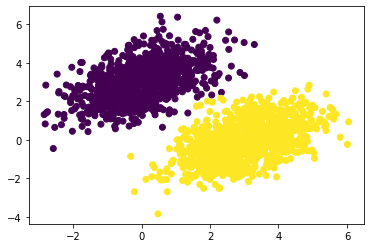

In [21]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()
#2 classes of random points in 2D plan

**Creating the linear classifier variables**

In [22]:
input_dim = 2 #for 2D points
output_dim = 1 #single score per sample (close to 0{1} if sample is predicted to be in class 0{1})
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [23]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [25]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions) #tensor with same shape as targets & predictions containing per sample loss scores
    return tf.reduce_mean(per_sample_losses)#we need to average these per sample loss scores into a single scalar loss value

**The training step function using gradient descent**

In [26]:
learning_rate = 0.1

def training_step(inputs, targets):
    #forward pass, inside a gradient tape scope
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) #retrieve the gradient of the loss with regard to weight
    #update the weights
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

40 steps of training (40 epochs)

In [27]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.9232
Loss at step 1: 0.0857
Loss at step 2: 0.0791
Loss at step 3: 0.0744
Loss at step 4: 0.0702
Loss at step 5: 0.0664
Loss at step 6: 0.0629
Loss at step 7: 0.0596
Loss at step 8: 0.0567
Loss at step 9: 0.0540
Loss at step 10: 0.0516
Loss at step 11: 0.0493
Loss at step 12: 0.0472
Loss at step 13: 0.0453
Loss at step 14: 0.0436
Loss at step 15: 0.0420
Loss at step 16: 0.0406
Loss at step 17: 0.0392
Loss at step 18: 0.0380
Loss at step 19: 0.0369
Loss at step 20: 0.0359
Loss at step 21: 0.0349
Loss at step 22: 0.0341
Loss at step 23: 0.0333
Loss at step 24: 0.0326
Loss at step 25: 0.0319
Loss at step 26: 0.0313
Loss at step 27: 0.0308
Loss at step 28: 0.0303
Loss at step 29: 0.0298
Loss at step 30: 0.0294
Loss at step 31: 0.0290
Loss at step 32: 0.0286
Loss at step 33: 0.0283
Loss at step 34: 0.0280
Loss at step 35: 0.0277
Loss at step 36: 0.0275
Loss at step 37: 0.0273
Loss at step 38: 0.0270
Loss at step 39: 0.0269


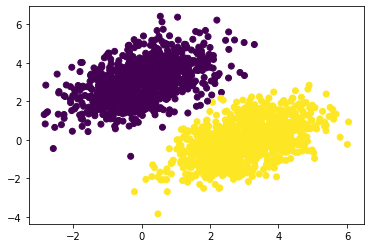

In [28]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

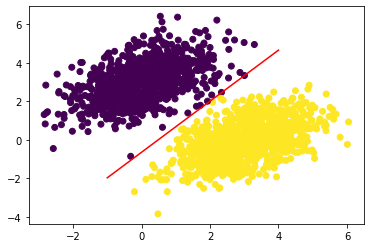

In [29]:
x = np.linspace(-1, 4, 100) #generate 100 regularly spaced numbers bet/ -1 & 4 which we will use to plot our line
y = - W[0] /  W[1] * x + (0.5 - b) / W[1] #line's equation
plt.plot(x, y, "-r") #plot our line ("-r" means "plot it as red")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5) #plot our model's pred° on same plot

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

A layer is a data processing module that takes as input tensors and that outputs tensors

Ex) densely connected layer, called fully connected or dense layer (Dense class in Keras)

#### The base Layer class in Keras

Layer is object that encapsulates some state (weights) and computation (forward pass)

weights are typically defined in a build() (although they could also be created in the constructor, __init__()), and the computation is defined in the call() method.

**A `Dense` layer implemented as a `Layer` subclass**

In [30]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer): #all keras layers inherit from the base layer class

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape): #weight creation takes place in the build() method
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")
        #add_weight() is a shortcut method for creating weights. 
        #It's also possible to create standalone variables & assign them as layer attributes, like self

    #We define the forward pass computation in the call() method    
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

Once instantiated, a layer like this can be used just like a function, taking as input a TensorFlow tensor:

In [31]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu) #instantiate our layer defined previously
input_tensor = tf.ones(shape=(2, 784)) #create some test inputs
output_tensor = my_dense(input_tensor) #call the layer on the inputs, just like a function 
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [32]:
#dense layer with 32 output units
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

layers didn’t receive any information about the shape of their inputs—instead, they automatically inferred their input shape as being the shape of the first inputs they see.

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

Compare the Dense layer we implemented in CHAP2
model=NaiveSequential([
  
                       NaiveDense(input_size=784, output_size=32, activation="relu"),
                       NaiveDense(input_size=32, output_size=64, activation="relu"),
                       NaiveDense(input_size=64, output_size=32, activation="relu"),
                       NaiveDense(input_size=32, output_size=10, activation="softmax"),
])

### From layers to models

A deep learning model is a graph of layers. So far we've learned Sequential model

There are much broader variety of network
topologies: Two-branch networks, Multihead
networks, Residual connections, etc.

There are generally two ways of building
such models in Keras: you could directly
subclass the Model class, or you could use
the Functional API, which lets you do more
with less code. (Will be covered from
chapter 7)

Picking the right network architecture is
more an art than a science, and although
there are some best practices and
principles you can rely on.


### The "compile" step: Configuring the learning process

In [35]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [36]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

Choosing the right loss function for the right problem is extremely important

There are simple guidelines you can follow to choose:

> Binary crossentropy for a two-class classification

> Categorical crossentropy for a many-class classification problem

> Mean squared error for regression problem

### Understanding the fit() method

Key arguments:


> The data (inputs and targets) to train on: NumPy arrays or a TensorFlow Dataset object.

> The number of epochs to train for: how many times the training loop iterate over the data passed.

> The batch size to use within each epoch of mini-batch gradient descent: the number of
training examples considered to compute the gradients for one weight update step.
k



**Calling `fit()` with NumPy data**

In [37]:
history = model.fit(
    inputs, #input examples, as a numpy array
    targets, #corresponding training targets as numpy array
    epochs=5, #training loop will iterate over the data 5 times
    batch_size=128 #the trainin loop will iterate over the data in batches of 128 examples
)

Epoch 1/5
16/16 [==============================] - 1s 5ms/step - loss: 6.8439 - binary_accuracy: 0.0070
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 6.5270 - binary_accuracy: 0.0070
Epoch 3/5
16/16 [==============================] - 0s 3ms/step - loss: 6.2577 - binary_accuracy: 0.0070
Epoch 4/5
16/16 [==============================] - 0s 3ms/step - loss: 5.9987 - binary_accuracy: 0.0070
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 5.7468 - binary_accuracy: 0.0070


In [38]:
history.history

{'binary_accuracy': [0.007000000216066837,
  0.007000000216066837,
  0.007000000216066837,
  0.007000000216066837,
  0.007000000216066837],
 'loss': [6.843898773193359,
  6.527038097381592,
  6.257726192474365,
  5.998719692230225,
  5.746751308441162]}

### Monitoring loss and metrics on validation data

To keep an eye on how the model does on new data, it’s standard practice to reserve a subset of the training data as validation data: you won’t be training the model on this data, but you will use it to compute a loss value and metrics value

**Using the `validation_data` argument**

In [39]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

#to avoid having samples from only one class in the validation data, shuffle inputs
#&targets using a random indices permutation
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

#reserve 30% of the trainin inputs and targets for validation 
#(we'll exclude these samples from training and reserve them to compute the validation loss & metrics)
num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]

#training data, used to update weights of the model
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets) #valdata used only to monitor the validation loss & metrics
)

Epoch 1/5
88/88 [==============================] - 1s 8ms/step - loss: 0.3253 - binary_accuracy: 0.9621 - val_loss: 0.0300 - val_binary_accuracy: 0.9967
Epoch 2/5
88/88 [==============================] - 0s 5ms/step - loss: 0.0748 - binary_accuracy: 0.9593 - val_loss: 0.0695 - val_binary_accuracy: 0.9850
Epoch 3/5
88/88 [==============================] - 0s 5ms/step - loss: 0.0695 - binary_accuracy: 0.9579 - val_loss: 0.4999 - val_binary_accuracy: 0.6100
Epoch 4/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0693 - binary_accuracy: 0.9614 - val_loss: 0.4384 - val_binary_accuracy: 0.7483
Epoch 5/5
88/88 [==============================] - 0s 3ms/step - loss: 0.0794 - binary_accuracy: 0.9471 - val_loss: 0.0379 - val_binary_accuracy: 0.9983


In [40]:
loss_and_metrics=model.evaluate(val_inputs, val_targets, batch_size=128)

5/5 [==============================] - 0s 4ms/step - loss: 0.0379 - binary_accuracy: 0.9983


### Inference: Using a model after training

Once you’ve trained your model, you’re going to want to use it to make predictions on new data

However, this will process all inputs in new_inputs at once, which may not be feasible if you’re looking at a lot of data

In [41]:
predictions = model.predict(val_inputs, batch_size=128) #take a numpy array or dataset & returns a numpy array
print(predictions[:10])

[[-0.25196972]
 [-0.03334162]
 [-0.20754603]
 [-0.10719952]
 [ 0.01920441]
 [ 0.7524129 ]
 [-0.31522563]
 [ 0.20659682]
 [ 0.7982116 ]
 [ 0.2133953 ]]


## Summary